#  Let us assume we are in the city of Hamburg and we want to travel to Munich. We will have to change trains in Frankfurt am Main. We know from previous train journeys that our train from Hamburg might be delayed and the we will not catch our connecting train in Frankfurt. The probability that we will not be in time for our connecting train depends on how high our possible delay will be. The connecting train will not wait for more than five minutes. Sometimes the other train is delayed as well.

The following lists 'in_time' (the train from Hamburg arrived in time to catch the connecting train to Munich) and 'too_late' (connecting train is missed) are data showing the situation over some weeks. The first component of each tuple shows the minutes the train was late and the second component shows the number of time this occurred.

In [6]:
# the tuples consist of (delay time of train1, number of times)


# tuples are (minutes, number of times)
in_time = [(0, 22), (1, 19), (2, 17), (3, 18),
           (4, 16), (5, 15), (6, 9), (7, 7),
           (8, 4), (9, 3), (10, 3), (11, 2)]
too_late = [(6, 6), (7, 9), (8, 12), (9, 17), 
            (10, 18), (11, 15), (12,16), (13, 7),
            (14, 8), (15, 5)]

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11) (22, 19, 17, 18, 16, 15, 9, 7, 4, 3, 3, 2)


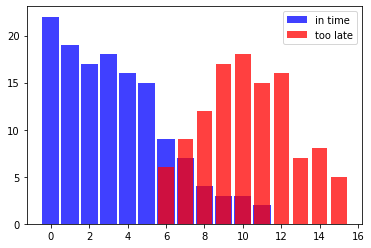

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

X, Y = zip(*in_time)
print(X,Y)
X2, Y2 = zip(*too_late)

bar_width = 0.9
plt.bar(X, Y, bar_width,  color="blue", alpha=0.75, label="in time")
bar_width = 0.8
plt.bar(X2, Y2, bar_width,  color="red", alpha=0.75, label="too late")
plt.legend(loc='upper right')
plt.show()

# From this data we can deduce that the probability of catching the connecting train if we are one minute late is 1, because we had 19 successful cases experienced and no misses, i.e. there is no tuple with 1 as the first component in 'too_late'.

We will denote the event "train arrived in time to catch the connecting train" with 
(success) and the 'unlucky' event "train arrived too late to catch the connecting train" with 

(miss)

We can now define the probability "catching the train given that we are 1 minute late" formally:


We used the fact that the tuple 

is in 'in_time' and there is no tuple with the first component 1 in 'too_late'

It's getting critical for catching the connecting train to Munich, if we are 6 minutes late. Yet, the chances are still 60 %:


Accordingly, the probability for missing the train knowing that we are 6 minutes late is:


We can write a 'classifier' function, which will give the probability for catching the connecting train:

In [8]:
in_time_dict = dict(in_time)
too_late_dict = dict(too_late)

def catch_the_train(min):
    s = in_time_dict.get(min, 0)
    if s == 0:
        return 1
    else:
        m = too_late_dict.get(min, 0)
        return s / (s + m)

for minutes in range(-1, 13):
    print(minutes, catch_the_train(minutes))

-1 1
0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 0.6
7 0.4375
8 0.25
9 0.15
10 0.14285714285714285
11 0.11764705882352941
12 1


# We will use a file called 'person_data.txt'. It contains 100 random person data, male and female, with body sizes, weights and gender tags.

In [9]:
import numpy as np

genders = ["male", "female"]
persons = []
with open("person_data.txt") as fh:
    for line in fh:
        persons.append(line.strip().split())

firstnames = {}
heights = {}
for gender in genders:
    firstnames[gender] = [ x[0] for x in persons if x[4]==gender]
    heights[gender] = [ x[2] for x in persons if x[4]==gender]
    heights[gender] = np.array(heights[gender], np.int)
    
for gender in ("female", "male"):
    print(gender + ":")
    print(firstnames[gender][:10])
    print(heights[gender][:10])



female:
['Stephanie', 'Cynthia', 'Katherine', 'Elizabeth', 'Carol', 'Christina', 'Beverly', 'Sharon', 'Denise', 'Rebecca']
[149 174 183 138 145 161 179 162 148 196]
male:
['Randy', 'Jessie', 'David', 'Stephen', 'Jerry', 'Billy', 'Earl', 'Todd', 'Martin', 'Kenneth']
[184 175 187 192 204 180 184 174 177 200]


#  Warning: There might be some confusion between a Python class and a Naive Bayes class. We try to avoid it by saying explicitly what is meant, whenever possible!

Designing a Feature class

We will now define a Python class "Feature" for the features, which we will use for classification later.

The Feature class needs a label, e.g. "heights" or "firstnames". If the feature values are numerical we may want to "bin" them to reduce the number of possible feature values. The heights from our persons have a huge range and we have only 50 measured values for our Naive Bayes classes "male" and "female". We will bin them into ranges "130 to 134", "135 to 139", "140 to 144" and so on by setting bin_width to 5. There is no way of binning the first names, so bin_width will be set to None.

The method frequency returns the number of occurrencies for a certain feature value or a binned range.


In [26]:
from collections import Counter
import numpy as np

class Feature:
    
    def __init__(self, data, name=None, bin_width=None):
        self.name = name
        self.bin_width = bin_width
        if bin_width:
            self.min, self.max = min(data), max(data)
            bins = np.arange((self.min // bin_width) * bin_width, 
                                (self.max // bin_width) * bin_width,
                                bin_width)
            freq, bins = np.histogram(data, bins)
            self.freq_dict = dict(zip(bins, freq))
            self.freq_sum = sum(freq)
        else:
            self.freq_dict = dict(Counter(data))
            self.freq_sum = sum(self.freq_dict.values())
            
        
        
    def frequency(self, value):
        if self.bin_width:
            value = (value // self.bin_width) * self.bin_width
        if value in self.freq_dict:
            return self.freq_dict[value]
        else:
            return 0

#   We will create now two feature classes Feature for the height values of the person data set. One Feature class contains the height for the Naive Bayes class "male" and one the heights for the class "female":


In [11]:
fts = {}
for gender in genders:
    fts[gender] = Feature(heights[gender], name=gender, bin_width=5)
    print(gender, fts[gender].freq_dict)

male {155: 1, 160: 5, 165: 4, 170: 6, 175: 7, 180: 5, 185: 8, 190: 8, 195: 2, 200: 3}
female {130: 1, 135: 1, 140: 0, 145: 3, 150: 5, 155: 7, 160: 8, 165: 11, 170: 7, 175: 2, 180: 4, 185: 0}


#  Bar Chart of Frequency Distribution

We printed out the frequencies of our bins, but it is a lot better to see these values dipicted in a bar chart. We will do this with the following code:


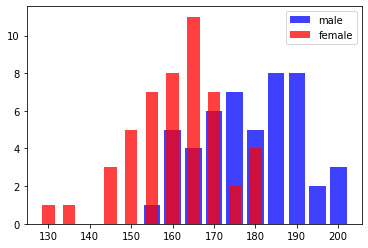

In [12]:
for gender in genders:
    frequencies = list(fts[gender].freq_dict.items())
    frequencies.sort(key=lambda x: x[1])
    X, Y = zip(*frequencies)
    color = "blue" if gender=="male" else "red"
    bar_width = 4 if gender=="male" else 3
    plt.bar(X, Y, bar_width, color=color, alpha=0.75, label=gender)


plt.legend(loc='upper right')
plt.show()

# We have to design now a Naive Bayes class in Python. We will call it NBclass. An NBclass contains one or more Feature classes. The name of the NBclass will be stored in self.name.

In [13]:
class NBclass:
        
        def __init__(self, name, *features):
            self.features = features
            self.name = name
            
        def probability_value_given_feature(self, 
                                            feature_value,
                                            feature):
            """
            p_value_given_feature returns the probability p 
            for a feature_value 'value' of the feature  to occurr
            corresponds to P(d_i | p_j)
            where d_i is a feature variable of the feature i
            """
            
            if feature.freq_sum == 0:
                return 0
            else:
                return feature.frequency(feature_value) / feature.freq_sum

# In the following code, we will create NBclasses with one feature, i.e. the height feature. We will use the Feature classes of fts, which we have previously created:


In [14]:
cls = {}
for gender in genders:
    cls[gender] = NBclass(gender, fts[gender])

# The final step for creating a simple Naive Bayes classifier consists in writing a class 'Classifier', which will use our classes 'NBclass' and 'Feature'.

In [15]:


class Classifier:
    
    def __init__(self, *nbclasses):
        self.nbclasses = nbclasses
        
        
    def prob(self, *d, best_only=True):
        
        nbclasses = self.nbclasses
        probability_list = []
        for nbclass in nbclasses:            
            ftrs = nbclass.features
            prob = 1
            for i in range(len(ftrs)):
                prob *= nbclass.probability_value_given_feature(d[i], ftrs[i])
              
            probability_list.append( (prob, nbclass.name) )

        prob_values = [f[0] for f in probability_list]
        prob_sum = sum(prob_values)
        if prob_sum==0:
            number_classes = len(self.nbclasses)
            pl = []
            for prob_element in probability_list:
                pl.append( ((1 / number_classes), prob_element[1]))
            probability_list = pl
        else:
            probability_list = [ (p[0] / prob_sum, p[1])  for p in probability_list]
        if best_only:
            return max(probability_list)
        else:
            return probability_list





# We will create a classifier with one feature class 'height'. We check it with values between 130 and 220 cm.


In [16]:
c = Classifier(cls["male"], cls["female"])

for i in range(130, 220, 5):
    print(i, c.prob(i, best_only=False))

130 [(0.0, 'male'), (1.0, 'female')]
135 [(0.0, 'male'), (1.0, 'female')]
140 [(0.5, 'male'), (0.5, 'female')]
145 [(0.0, 'male'), (1.0, 'female')]
150 [(0.0, 'male'), (1.0, 'female')]
155 [(0.125, 'male'), (0.875, 'female')]
160 [(0.3846153846153847, 'male'), (0.6153846153846154, 'female')]
165 [(0.26666666666666666, 'male'), (0.7333333333333333, 'female')]
170 [(0.4615384615384616, 'male'), (0.5384615384615385, 'female')]
175 [(0.7777777777777778, 'male'), (0.22222222222222224, 'female')]
180 [(0.5555555555555556, 'male'), (0.4444444444444445, 'female')]
185 [(1.0, 'male'), (0.0, 'female')]
190 [(1.0, 'male'), (0.0, 'female')]
195 [(1.0, 'male'), (0.0, 'female')]
200 [(1.0, 'male'), (0.0, 'female')]
205 [(0.5, 'male'), (0.5, 'female')]
210 [(0.5, 'male'), (0.5, 'female')]
215 [(0.5, 'male'), (0.5, 'female')]


# There are no persons - neither male nor female - in our learn set, with a body height between 140 and 144. This is the reason, why our classifier can't base its result on learned data and therefore comes back with a fify-fifty result.

We can also train a classifier with our firstnames:


In [57]:
fts = {}
cls = {}
for gender in genders:
    fts_names = Feature(firstnames[gender], name=gender)
    cls[gender] = NBclass(gender, fts_names)
    
c = Classifier(cls["male"], cls["female"])

testnames = ['Edgar', 'Benjamin', 'Fred', 'Albert', 'Laura', 
             'Maria', 'Paula', 'Sharon', 'Jessie']
for name in testnames:
    print(name, c.prob(name))

Edgar (0.5, 'male')
Benjamin (1.0, 'male')
Fred (1.0, 'male')
Albert (1.0, 'male')
Laura (1.0, 'female')
Maria (1.0, 'female')
Paula (1.0, 'female')
Sharon (1.0, 'female')
Jessie (0.6666666666666667, 'female')


# The name "Jessie" is an ambiguous name. There are about 66 boys per 100 girls with this name. We can learn from the previous classification results that the probability for the name "Jessie" being "female" is about two-thirds, which is calculated from our data set "person":


In [58]:
[person for person in persons if person[0] == "Jessie"]

[['Jessie', 'Morgan', '175', '67.0', 'male'],
 ['Jessie', 'Bell', '165', '65', 'female'],
 ['Jessie', 'Washington', '159', '56', 'female'],
 ['Jessie', 'Davis', '174', '45', 'female'],
 ['Jessie', 'Johnson', '165', '30.0', 'male'],
 ['Jessie', 'Thomas', '168', '69', 'female']]

# Jessie Washington is only 159 cm tall. If we have a look at the results of our Classifier, trained with heights, we see that the likelihood for a person 159 cm tall of being "female" is 0.875. So what about an unknown person called "Jessie" and being 159 cm tall? Is this person female or male?

To answer this question, we will train an Naive Bayes classifier with two feature classes, i.e. heights and firstnames:


In [59]:
cls = {}
for gender in genders:
    fts_heights = Feature(heights[gender], name="heights", bin_width=5)
    fts_names = Feature(firstnames[gender], name="names")

    cls[gender] = NBclass(gender, fts_names, fts_heights)


c = Classifier(cls["male"], cls["female"])

for d in [("Maria", 140), ("Anthony", 200), ("Anthony", 153), 
          ("Jessie", 188) , ("Jessie", 159), ("Jessie", 160) ]:
    print(d, c.prob(*d, best_only=False))

('Maria', 140) [(0.5, 'male'), (0.5, 'female')]
('Anthony', 200) [(1.0, 'male'), (0.0, 'female')]
('Anthony', 153) [(0.5, 'male'), (0.5, 'female')]
('Jessie', 188) [(1.0, 'male'), (0.0, 'female')]
('Jessie', 159) [(0.06666666666666667, 'male'), (0.9333333333333333, 'female')]
('Jessie', 160) [(0.23809523809523817, 'male'), (0.761904761904762, 'female')]
